In [1]:
import dendropy
import glob
from dendropy.calculate import treecompare
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reference_tree = dendropy.Tree.get_from_path("data/barden.tre", schema = "nexus", preserve_underscores=True)
for edge in reference_tree.postorder_edge_iter():
    if edge.length is None:
        edge.length = 0.01

In [86]:
list_trees = []
list_trees = glob.glob("output/100/no_missing/2_large/*.mcc.tre")


In [77]:
list_untrees = []

list_untrees = glob.glob("output/100/missing/5_large_missing_unpart/*mcc.tre")

In [78]:
total_diffs = 2*len(reference_tree.nodes()) - 2

In [79]:
rf_unlist = []
for tree in list_untrees:
    est_tree = dendropy.Tree.get_from_path(tree, schema = "nexus", preserve_underscores = True, taxon_namespace = reference_tree.taxon_namespace)
#    unrf = treecompare.robinson_foulds_distance(reference_tree, est_tree)
#    unrf = treecompare.symmetric_difference(reference_tree, est_tree)

#    rf_unlist.append((treecompare.symmetric_difference(est_tree,reference_tree))/total_diffs)
    rf_unlist.append(treecompare.euclidean_distance(est_tree,reference_tree))
len(rf_unlist)

99

In [87]:
rf_list = []
for tree in list_trees:
    est_tree = dendropy.Tree.get_from_path(tree, schema = "nexus", preserve_underscores = True, taxon_namespace = reference_tree.taxon_namespace)
    for edge in est_tree.postorder_edge_iter():
        if edge.length is None:
            edge.length = 0
    rf_list.append(treecompare.euclidean_distance(est_tree,reference_tree))
#    rf = treecompare.robinson_foulds_distance(reference_tree, est_tree)
#    rf = treecompare.symmetric_difference(reference_tree, est_tree)
#    rf_list.append((treecompare.symmetric_difference(est_tree,reference_tree))/total_diffs)

len(rf_list)

102

In [90]:
df = pd.DataFrame({'RF': rf_list}) #, 'unRF': rf_unlist})
#df["Magnitude"] = df["unRF"] - df["RF"]
df

,RF
0,2.410823
1,2.346640
2,2.361072
3,2.303434
4,2.406686
...,...
97,2.387511
98,2.367624
99,2.340024
100,2.359973


In [66]:
df.Magnitude.mean()

-1.0710945002722754

array([[<AxesSubplot:title={'center':'RF'}>,
        <AxesSubplot:title={'center':'unRF'}>],
       [<AxesSubplot:title={'center':'Magnitude'}>, <AxesSubplot:>]],
      dtype=object)

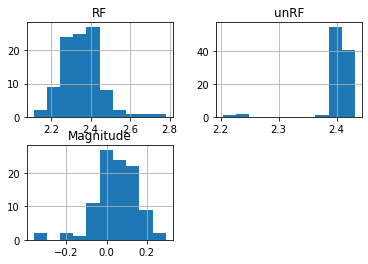

In [32]:
df.hist()

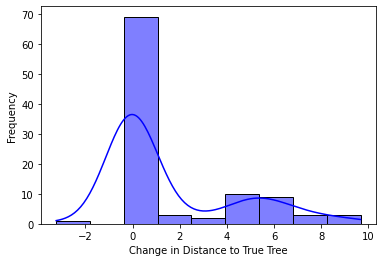

In [56]:
sns.histplot(df["Magnitude"], kde = True, color = "blue")
plt.xlabel("Change in Distance to True Tree")
plt.ylabel("Frequency")
#plt.savefig("3_small_bldist.pdf")
plt.show()

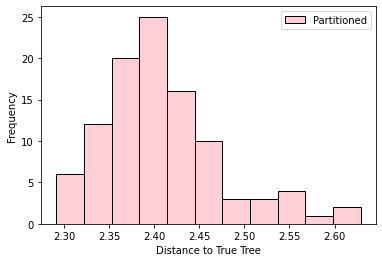

In [93]:
#sns.histplot(df["unRF"], label = "Unpartitioned", color = "teal")
sns.histplot(df["RF"], label = "Partitioned", color = "pink")
plt.xlabel("Distance to True Tree")
plt.ylabel("Frequency")
#plt.text(.302, 42, "Magnitude =" + str(round(df.Magnitude.mean(), 3)), horizontalalignment='left', size='medium', color='black')
plt.legend()
plt.savefig("2_large_BL.pdf")
plt.show()